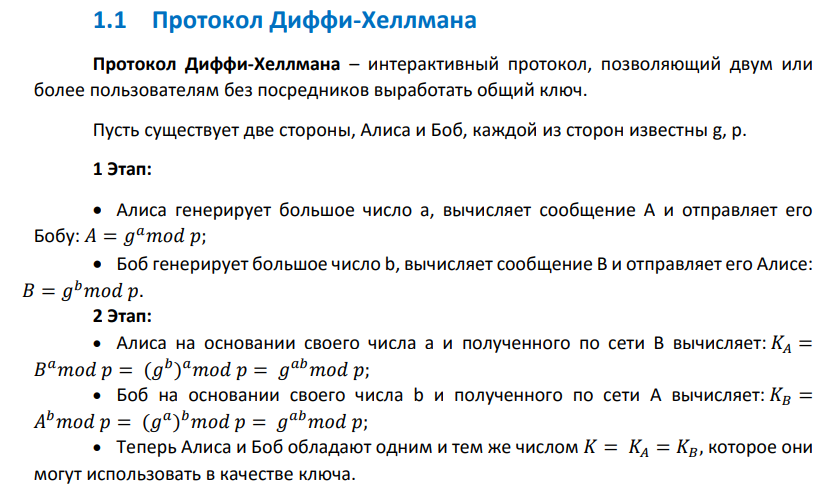

In [36]:
from Crypto.Util.number import getStrongPrime, inverse,bytes_to_long, long_to_bytes
import random
e=65537
p=getStrongPrime(1024,e=e)
g=2

In [50]:
# Alice
class Alice:
    def __init__(self):
        self.A = None
        self._a = random.randint(0,pow(10,10))
        self.K = None
        
    def calculate_A(self):
        self.A = pow(g,self._a,p)
        print("[Alice]:посчитан публичный ключ:",self.A)
    
    def send_A(self):
        return self.A
    
    def get_B_and_calculate_K(self,B):
        self.K = pow(B,self._a,p)
        print("[Alice]:посчитан общий ключ К:",self.K)

In [51]:
# Bob
class Bob:
    def __init__(self):
        self.B = None
        self._b = random.randint(0,pow(10,10))
        
    def calculate_B(self):
        self.B = pow(g,self._b,p)
        print("[Bob]:посчитан публичный ключ B:",self.B)

    def send_B(self):
        return self.B
    
    def get_A_and_calculate_K(self,A):
        self.K = pow(A,self._b,p)
        print("[Bob]:посчитан общий ключ К:",self.K)
        
Alice = Alice()
Bob = Bob()
Alice.calculate_A()
Bob.calculate_B()
B_mess = Bob.send_B()
A_mess = Alice.send_A()

Bob.get_A_and_calculate_K(A_mess)
Alice.get_B_and_calculate_K(B_mess)

[Alice]:посчитан публичный ключ: 82187672434021870142954675764616391233347903545781476097126866290770437351163559740259786821494619848291999925232239910178387433237393499434812558463575705976244233201669447077200375138895735964308128987573178887510122376013639326225289432761594571254405166088381963977968396607534248005172650967963589406560
[Bob]:посчитан публичный ключ B: 90702185054685220107721123773451183141019205687310578306803688096454913299902770054734835104937781999380428692128220166028934801141038588516748283041331605658915022930692869578356933944937981665171712851344721426553832187169283751503676884394044929784304849938858694103009505185141670337205473567116140178348
[Bob]:посчитан общий ключ К: 50093094703697996070385120506290047653355055465891820407535402170011362460093215209839644316705550937401886081752654706793791016214015760991233294462852869532852683966054900805243482940535550718876481547642099506409145124478347870902577524506972909312559421894386992750928883208422674662

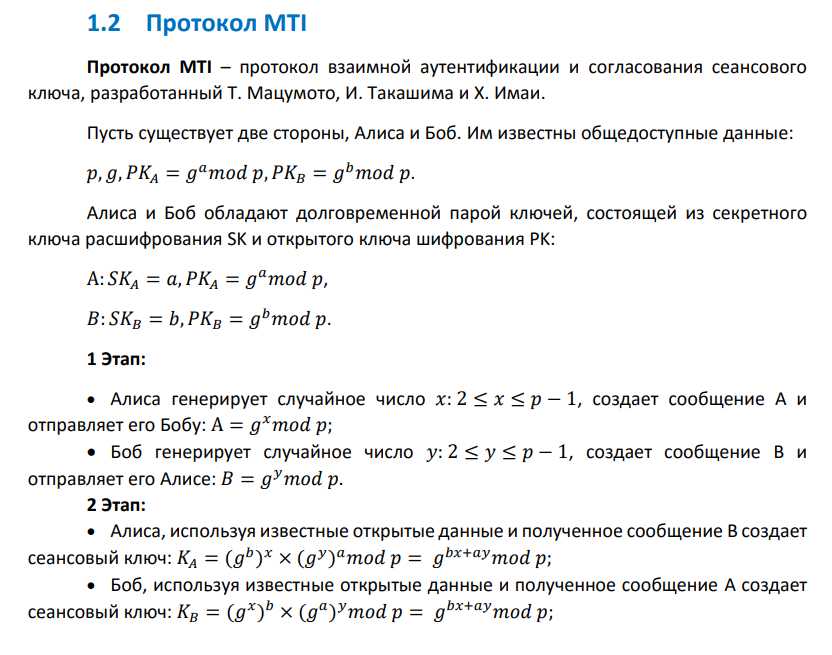

In [68]:
e=65537
p=getStrongPrime(1024,e=e)
g=2
p,q = getStrongPrime(1024,e=e),getStrongPrime(1024,e=e)

class Alice:
    def __init__(self):
        self.PKA = None
        self._SKA = random.randint(0,pow(10,10))
        self.K = None
        self.x = None
        
    def calculate_PKA(self):
        self.PKA = pow(g,self._SKA,p)
        print("[Alice]:посчитан публичный ключ PKA = g^a:",self.PKA)
        return self.PKA
    
    def generate_x_and_calculate_A(self):
        self.x = random.randint(2,p-1)
        return pow(g,self.x,p)
    
    def get_B_and_calculate_K(self,B,PKB):
        part_1 = pow(PKB,self.x,p)
        part_2 = pow(B,self._SKA,p)
        self.K = (part_1*part_2)%p
        print("\n[Alice]:посчитан общий ключ К = (g^b)^x*(g^y)^a:",self.K)
        
# Bob
class Bob:
    def __init__(self):
        self.PKB = None
        self._SKB = random.randint(0,pow(10,10))
        self.y = None
        
    def calculate_PKB(self):
        self.PKB = pow(g,self._SKB,p)
        print("[Bob]:посчитан публичный ключ PKB = g^b:",self.PKB)
        return self.PKB

    def generate_y_and_calculate_B(self):
        self.y = random.randint(2,p-1)
        return pow(g,self.y,p)
    
    def get_A_and_calculate_K(self,A,PKA):
        part_1 = pow(PKA,self.y,p)
        part_2 = pow(A,self._SKB,p)
        self.K = (part_1*part_2)%p
        print("[Bob]:посчитан общий ключ К = (g^x)^b*(g^a)^y:",self.K)
        
A = Alice()
B = Bob()
PKA = A.calculate_PKA()
PKB = B.calculate_PKB()
print("_"*120)

A_mess = A.generate_x_and_calculate_A()
print("Сообщение от Алисы Бобу A_mess = g^x:",A_mess)
B_mess = B.generate_y_and_calculate_B()
print("Сообщение от Боба Алисе B_mess = g^y:",B_mess)


A.get_B_and_calculate_K(B_mess, PKB)
B.get_A_and_calculate_K(A_mess, PKA)

[Alice]:посчитан публичный ключ PKA = g^a: 32479797686969463402317665052137030563182239964291645830207622221707714848227630317788451500564356170418573575545166553404060087534479541075262074384115960320534519282410882038480021813247293185515822133453160053038098196899769434312347594597944141529766980687419096279711933969387076633331243277695743072573
[Bob]:посчитан публичный ключ PKB = g^b: 1052774514264325738185246661147180324061544566695254734676313584947979956109925164651517507204941593656028512265366485258445408248455104092409331273869701775124621453225485510581359720852300732528398394159630907537055268870776501524790972956710128789364648147427418048664382039417360990889209879062512109408
________________________________________________________________________________________________________________________
Сообщение от Алисы Бобу A_mess = g^x: 92624944513840235080580049697850667150052548536890553721563834199894472885456492990551739410039715158126947126093330765130080737587630198810

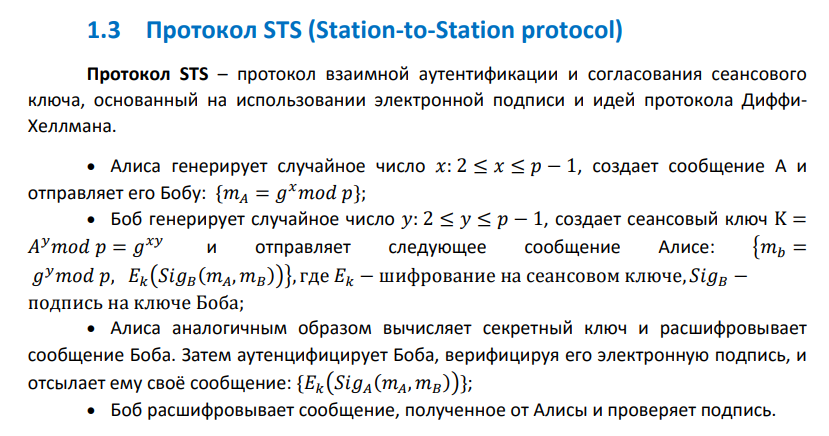

In [101]:
from Crypto.PublicKey import RSA
from Crypto.Signature import PKCS1_PSS
from Crypto.Hash import SHA256
from Crypto.Cipher import AES
e = 65537
g = 2
p,q = getStrongPrime(1024,e=e),getStrongPrime(1024,e=e)
# Alice
class Alice:
    def __init__(self):
        self.PKA = None
        self._SKA = random.randint(2,p-1)
        self.K = None
        self._sk_sign= RSA.generate(1024)
        self.pk_sign = self._sk_sign.publickey()

    def calculate_PKA(self):
        self.PKA = pow(g,self._SKA,p)
        print("[Alice]:посчитан публичный ключ PKA = g^x:",self.PKA)
        return self.PKA
    
    def get_m_from_Bob_and_calculate_K(self, m, pk_sign_B):
        PKB, Ek = m[0], m[1]
        self.K = pow(PKB,self._SKA,p)
        print("[Alice]: PK Bob получен: вычислен K:", self.K, "если подпись от Boba верна, то ключ К будет принят.")
        cipher = AES.new(long_to_bytes(self.K)[:16], AES.MODE_ECB)
        Bob_sign = cipher.decrypt(Ek)
        print("[Alice]: Sign from Bob:", Bob_sign)
        #####
        if self.check_sign(self.PKA+PKB, Bob_sign, pk_sign_B):
            print("[Alice]: Bob аутентифицирован, подпись проверена")
            Alice_sign = self.calc_sign(self.PKA+PKB)
            cipher = AES.new(long_to_bytes(self.K)[:16], AES.MODE_ECB)
            return cipher.encrypt(Alice_sign)
            
        else:
            print("[Alice]: Bob аутентифицирован: проверка подписи не прошла")
            return None
            
            
    def check_sign(self, m, sign, pk_sign):
        hash_ = SHA256.new(long_to_bytes(m))
        ver_res = PKCS1_PSS.new(pk_sign).verify(hash_, sign)
        return ver_res
           
    def calc_sign(self, m):
        hash_ = SHA256.new(long_to_bytes(m))
        signature = PKCS1_PSS.new(self._sk_sign).sign(hash_)
        return signature
           
# Bob
class Bob:
    def __init__(self):
        self.PKB = None
        self._SKB = random.randint(2,p-1)
        self.y = None
        self.K = None
        self._sk_sign= RSA.generate(1024)
        self.pk_sign = self._sk_sign.publickey()
        
    def calculate_PKB(self):
        self.PKB = pow(g,self._SKB,p)
        print("[Bob]:посчитан публичный ключ PKB = g^b:",self.PKB)
        return self.PKB
        
    def generate_y_and_calculate_K(self, PKA):
        self.K = pow(PKA,self._SKB,p)
        print("[Bob]: вычислен K:", self.K)
        sign = self.calc_sign(PKA+self.PKB)
        cipher = AES.new(long_to_bytes(self.K)[:16], AES.MODE_ECB)
        Ek = cipher.encrypt(bytes(sign))
        return (self.PKB, Ek)
    
    def calc_sign(self, m):
        hash_ = SHA256.new(long_to_bytes(m))
        signature = PKCS1_PSS.new(self._sk_sign).sign(hash_)
        return signature
    
    def check_sign(self, m, sign, pk_sign):
        hash_ = SHA256.new(long_to_bytes(m))
        ver_res = PKCS1_PSS.new(pk_sign).verify(hash_, sign)
        return ver_res
    
    def auth_Alice(self, mA, pk_sign_A, PKA):
        cipher = AES.new(long_to_bytes(self.K)[:16], AES.MODE_ECB)
        Alice_sign = cipher.decrypt(mA)
        print("Sign from Alice:", Alice_sign)
        #####
        if self.check_sign(PKA+self.PKB, Alice_sign, pk_sign_A):
            print("[Bob]: Alice аутентифицирована, подпись проверена")
    
print("Публичные ключи:")        
A = Alice()
B = Bob()
# публичные ключи подписей
pk_sign_A = A.pk_sign
pk_sign_B = B.pk_sign

PKA = A.calculate_PKA()
B.calculate_PKB()
print("_"*120)
mB = B.generate_y_and_calculate_K(PKA)
mA = A.get_m_from_Bob_and_calculate_K(mB, pk_sign_B)
B.auth_Alice(mA, pk_sign_A, PKA)

Публичные ключи:
[Alice]:посчитан публичный ключ PKA = g^x: 42425827378688285156234804705203619357551722044473482702713557679025258482865221594609546086215805518581265530121716401799656442687310876841270541219287883429439448686932691970900525836352126267177711565007310727843976132341617283674619400362565429211733040180364720890551241618539800377902630443828554411808
[Bob]:посчитан публичный ключ PKB = g^b: 119093059659541434593370807490293432694987386726392984901393061636679233701971651097387575541655295813759262882809662565129484998706483995156342869244218009943521784131947300867399828544308239269515138271154569858944199617932967916599808674404436643107326874755886924450458724012454553530127110247783806914536
________________________________________________________________________________________________________________________
[Bob]: вычислен K: 46269346294934597360751081954318995850785658882720758870196910785855072069019800036444369629005703540080821157335858780657098217698132025920